# Importing the relevant libraries

In [ ]:
import pandas as pd

# Data Preprocessing

### Importing the Database

In [ ]:
raw_data = pd.read_csv("ml_datasource.csv")
raw_data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


### Removing Outliers

Skewness of minutes_watched: 18.790415903287037


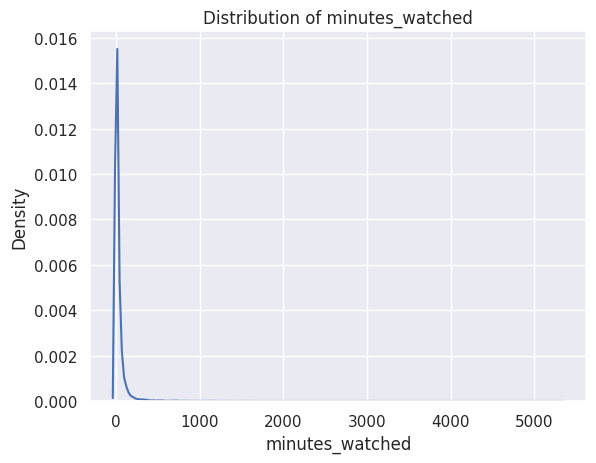

Skewness of courses_started: 6.230362251612512


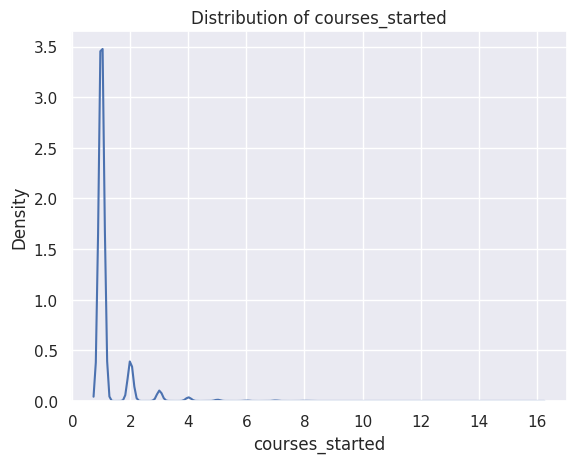

Skewness of practice_exams_started: 16.538525043566345


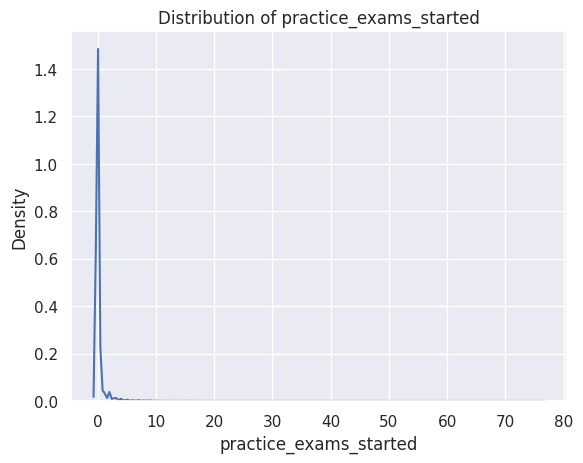

Skewness of practice_exams_passed: 18.799841954602464


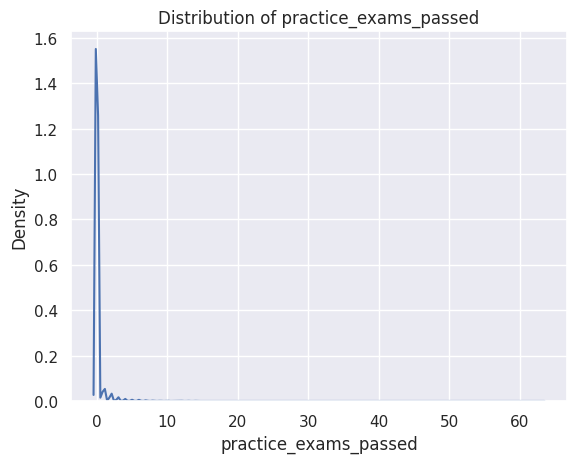

Skewness of minutes_spent_on_exams: 20.53094083722619


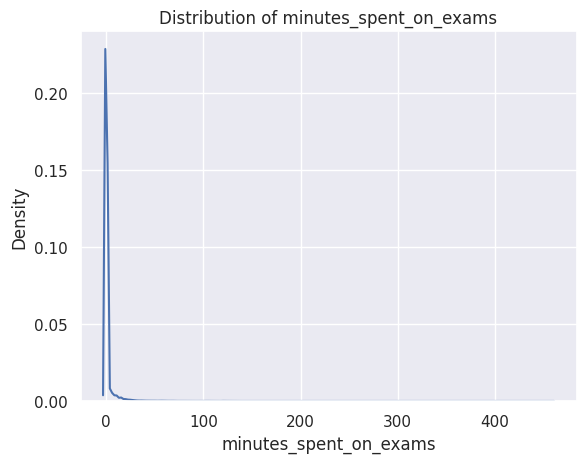

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

numerical_features=["minutes_watched","courses_started","practice_exams_started","practice_exams_passed","minutes_spent_on_exams"]
for feature in numerical_features:
    sns.kdeplot(raw_data[feature])
    print(f"Skewness of {feature}: {raw_data[feature].skew()}")
    plt.title(f"Distribution of {feature}")
    plt.show()


In [ ]:
raw_data=raw_data[(raw_data["minutes_watched"]<=1000)&
                  (raw_data["courses_started"]<=10)&
                  (raw_data["practice_exams_started"]<=10)&
                  (raw_data["minutes_spent_on_exams"]<=40)]

Skewness of minutes_watched: 6.023986327398794


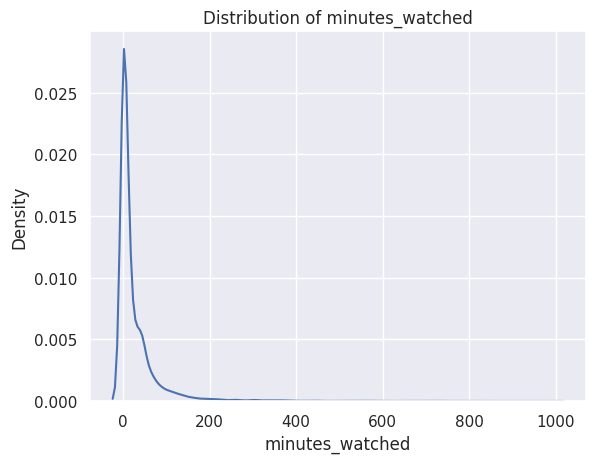

Skewness of courses_started: 4.662550714587453


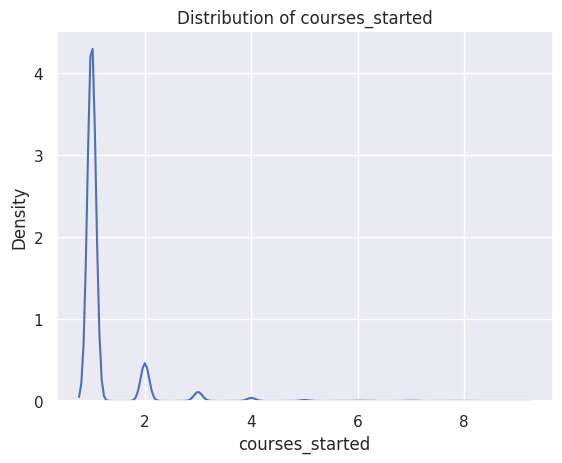

Skewness of practice_exams_started: 6.424314076644273


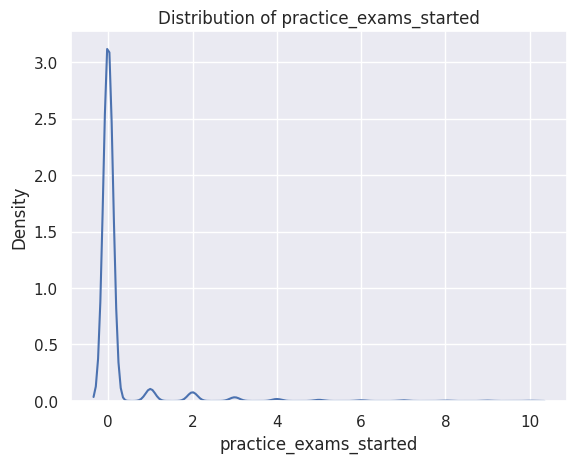

Skewness of practice_exams_passed: 7.030677762246787


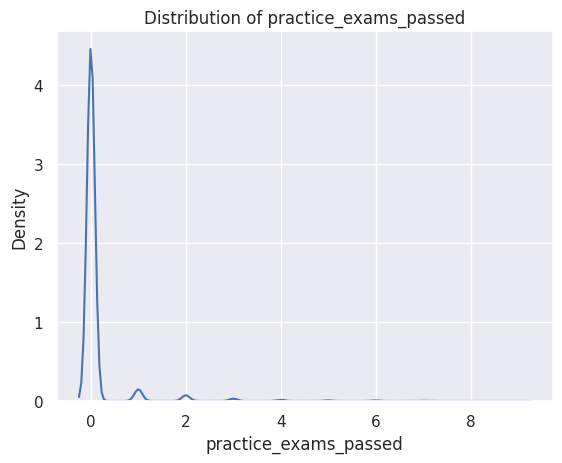

Skewness of minutes_spent_on_exams: 5.894145541985214


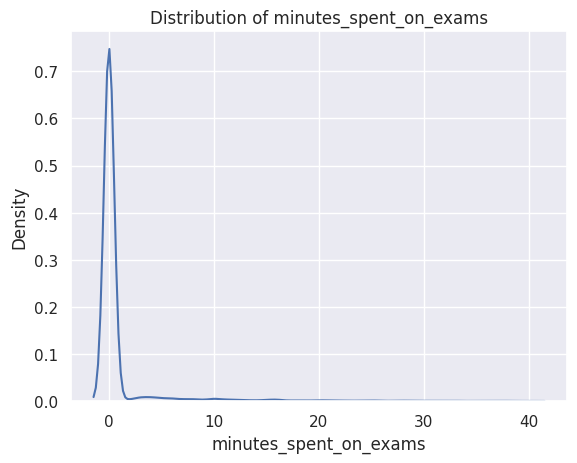

In [ ]:
numerical_features=["minutes_watched","courses_started","practice_exams_started","practice_exams_passed","minutes_spent_on_exams"]
for feature in numerical_features:
    sns.kdeplot(raw_data[feature])
    print(f"Skewness of {feature}: {raw_data[feature].skew()}")
    plt.title(f"Distribution of {feature}")
    plt.show()


### Checking for Multicollinearity

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = raw_data[numerical_features]
vif_data = pd.DataFrame(columns=['feature','VIF'])

for i,f in enumerate(X.columns):
    vif_data.loc[i] = [ f,variance_inflation_factor(X.values, i)]

print(vif_data)


                  feature        VIF
0         minutes_watched   1.740155
1         courses_started   1.539748
2  practice_exams_started  10.196074
3   practice_exams_passed   7.811401
4  minutes_spent_on_exams   3.338544


In [ ]:
max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
print("Feature with highest VIF:", max_vif_feature)
raw_data.drop(columns=max_vif_feature, inplace=True)


Feature with highest VIF: practice_exams_started


### Dealing with NaN Values

In [ ]:
raw_data.loc[raw_data['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
311,NaN,88,58.1,1,2,11.20,1
337,NaN,86,43.0,1,2,12.96,0
556,NaN,121,241.9,2,3,21.29,0
806,NaN,64,86.4,1,2,4.98,0
1097,NaN,72,67.5,1,1,6.27,0
12363,NaN,84,6.2,1,0,0.00,0
12633,NaN,78,3.0,1,0,0.00,0
16946,NaN,11,8.2,1,0,0.00,0


In [ ]:
# Replace NaN values in the student_country column with 'NAM'
data_no_nulls = raw_data.fillna({'student_country': 'NAM'})
print(data_no_nulls.isnull().sum())


student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64


### Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

X = data_no_nulls.drop(columns=['purchased'])
y = data_no_nulls['purchased']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365, stratify=y)


In [ ]:
num_rows_test_set = x_test.shape[0]
num_rows_test_set = len(x_test)
num_rows_test_set

3526

### Encoding the Data

In [ ]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=170)
x_train['student_country_enc'] = enc.fit_transform(x_train[['student_country']].to_numpy())
x_test['student_country_enc'] = enc.transform(x_test[['student_country']].to_numpy())
x_train.drop(columns=['student_country'], inplace=True)
x_test.drop(columns=['student_country'], inplace=True)
x_train_array = np.asarray(x_train, dtype='float')
y_train_array = np.asarray(y_train, dtype='int')
x_test_array = np.asarray(x_test, dtype='float')
y_test_array = np.asarray(y_test, dtype='int')


# Creating a Logistic Regression Model

Optimization terminated successfully.
         Current function value: 0.150289
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14093
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Mar 2024   Pseudo R-squ.:                  0.5111
Time:                        09:31:13   Log-Likelihood:                -2119.1
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0543      0.118     -8.961      0.000      -1.285      -0.824
x1            -0.0666      0

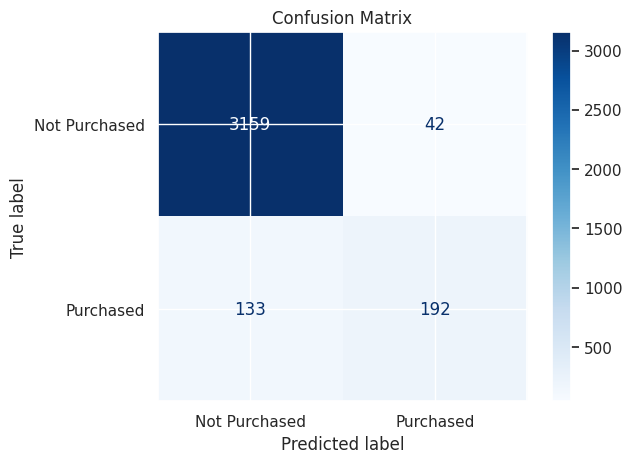

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
log_reg = sm.Logit(y_train_array, sm.add_constant(x_train_array))
log_reg_results = log_reg.fit()
print(log_reg_results.summary())
predicted_probabilities = log_reg_results.predict(sm.add_constant(x_test_array))
predicted_classes = (predicted_probabilities > 0.5).astype(int)
cm = confusion_matrix(y_test_array, predicted_classes)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Not Purchased', 'Purchased'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Creating a K-Nearest Neighbors Model

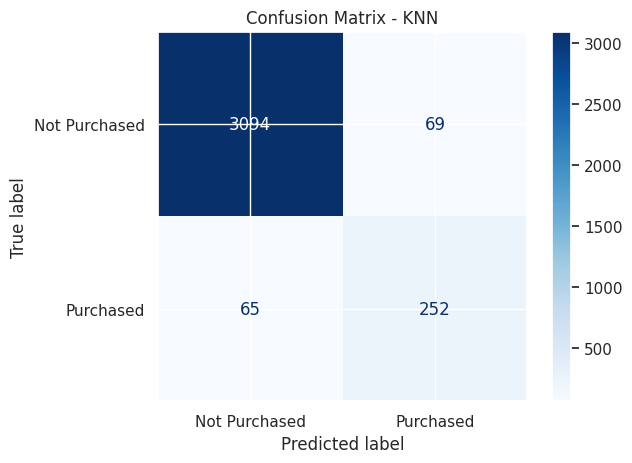

               precision    recall  f1-score   support

Not Purchased       0.98      0.98      0.98      3163
    Purchased       0.79      0.79      0.79       317

     accuracy                           0.96      3480
    macro avg       0.88      0.89      0.88      3480
 weighted avg       0.96      0.96      0.96      3480



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
parameters_knn = {'n_neighbors': range(1, 51), 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters_knn, scoring='accuracy')
grid_search_knn.fit(x_train_array, y_train_array)
knn_clf = grid_search_knn.best_estimator_
y_test_pred_knn = knn_clf.predict(x_test_array)
cm_knn = confusion_matrix(y_test_array, y_test_pred_knn)
cm_display_knn = ConfusionMatrixDisplay(cm_knn, display_labels=['Not Purchased', 'Purchased'])
cm_display_knn.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()
print(classification_report(y_test_array, y_test_pred_knn, target_names=['Not Purchased', 'Purchased']))


# Creating a Support Vector Machines Model

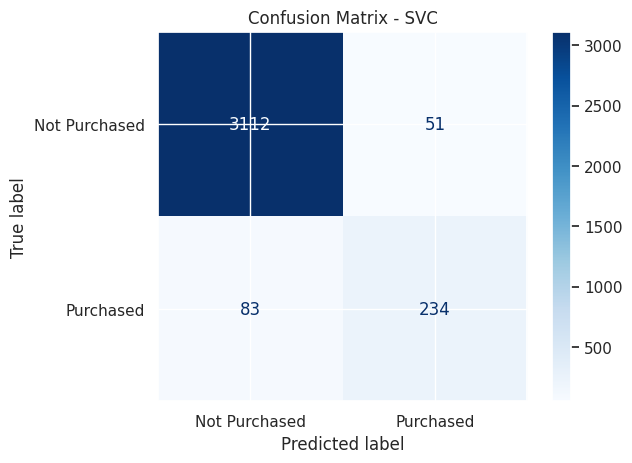

               precision    recall  f1-score   support

Not Purchased       0.97      0.98      0.98      3163
    Purchased       0.82      0.74      0.78       317

     accuracy                           0.96      3480
    macro avg       0.90      0.86      0.88      3480
 weighted avg       0.96      0.96      0.96      3480



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_scaled = scaler.fit_transform(x_train_array)
x_test_scaled = scaler.transform(x_test_array)
parameters_svc = {'kernel': ['linear', 'poly', 'rbf'], 'C': range(1, 11), 'gamma': ['scale', 'auto']}
grid_search_svc = GridSearchCV(estimator=SVC(), param_grid=parameters_svc, scoring='accuracy')
grid_search_svc.fit(x_train_scaled, y_train_array)
svc_clf = grid_search_svc.best_estimator_
y_test_pred_svc = svc_clf.predict(x_test_scaled)
cm_svc = confusion_matrix(y_test_array, y_test_pred_svc)
cm_display_svc = ConfusionMatrixDisplay(cm_svc, display_labels=['Not Purchased', 'Purchased'])
cm_display_svc.plot(cmap='Blues')
plt.title('Confusion Matrix - SVC')
plt.show()
print(classification_report(y_test_array, y_test_pred_svc, target_names=['Not Purchased', 'Purchased']))


# Creating a Decision Trees Model

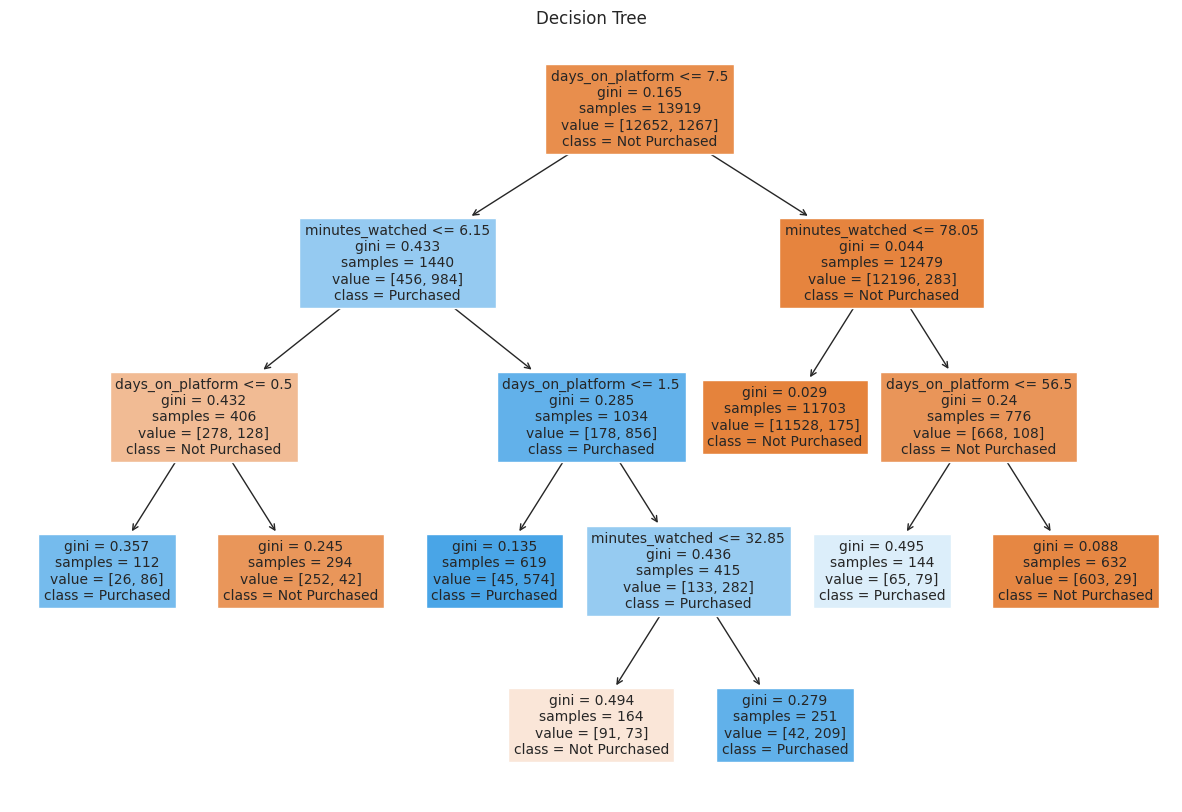

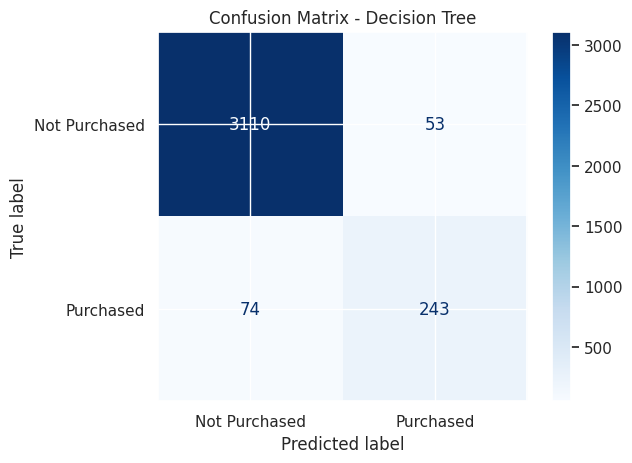

               precision    recall  f1-score   support

Not Purchased       0.98      0.98      0.98      3163
    Purchased       0.82      0.77      0.79       317

     accuracy                           0.96      3480
    macro avg       0.90      0.87      0.89      3480
 weighted avg       0.96      0.96      0.96      3480



In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
parameters_dt = {'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]}
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=365), param_grid=parameters_dt, scoring='accuracy')
grid_search_dt.fit(x_train_array, y_train_array)
dt_clf = grid_search_dt.best_estimator_
plt.figure(figsize=(15, 10))
plot_tree(dt_clf, filled=True, feature_names=x_train.columns, class_names=['Not Purchased', 'Purchased'], fontsize=10)
plt.title('Decision Tree')
plt.show()
y_test_pred_dt = dt_clf.predict(x_test_array)
cm_dt = confusion_matrix(y_test_array, y_test_pred_dt)
cm_display_dt = ConfusionMatrixDisplay(cm_dt, display_labels=['Not Purchased', 'Purchased'])
cm_display_dt.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
print(classification_report(y_test_array, y_test_pred_dt, target_names=['Not Purchased', 'Purchased']))


# Creating a Random Forests Model

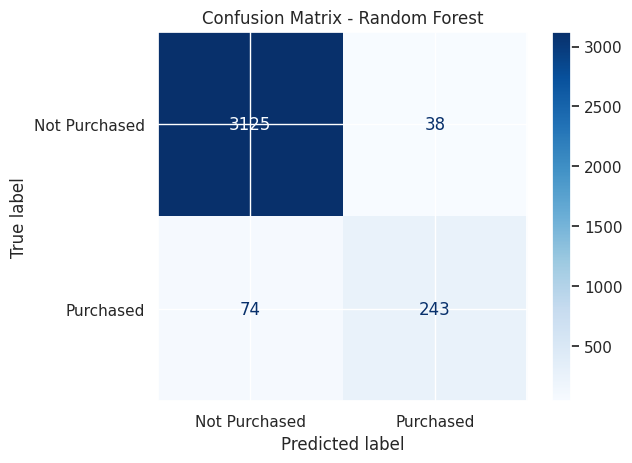

               precision    recall  f1-score   support

Not Purchased       0.98      0.99      0.98      3163
    Purchased       0.86      0.77      0.81       317

     accuracy                           0.97      3480
    macro avg       0.92      0.88      0.90      3480
 weighted avg       0.97      0.97      0.97      3480



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(ccp_alpha=grid_search_dt.best_params_['ccp_alpha'], random_state=365)
rf_clf.fit(x_train_array, y_train_array)
y_test_pred_rf = rf_clf.predict(x_test_array)
cm_rf = confusion_matrix(y_test_array, y_test_pred_rf)
cm_display_rf = ConfusionMatrixDisplay(cm_rf, display_labels=['Not Purchased', 'Purchased'])
cm_display_rf.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()
print(classification_report(y_test_array, y_test_pred_rf, target_names=['Not Purchased', 'Purchased']))
